<a href="https://colab.research.google.com/github/LGreenII/CS4410MachineLearning/blob/main/LevonGreenCS4410Week8HomeworkFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 438 kB 14.9 MB/s 
     |████████████████████████████████| 5.9 MB 48.2 MB/s 
     |████████████████████████████████| 1.7 MB 45.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [50]:
from tensorflow.keras.datasets import fashion_mnist

In [51]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
y_train.shape

(60000,)

In [54]:
X_test.shape

(10000, 28, 28)

In [55]:
y_test.shape

(10000,)

In [56]:
%matplotlib inline

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

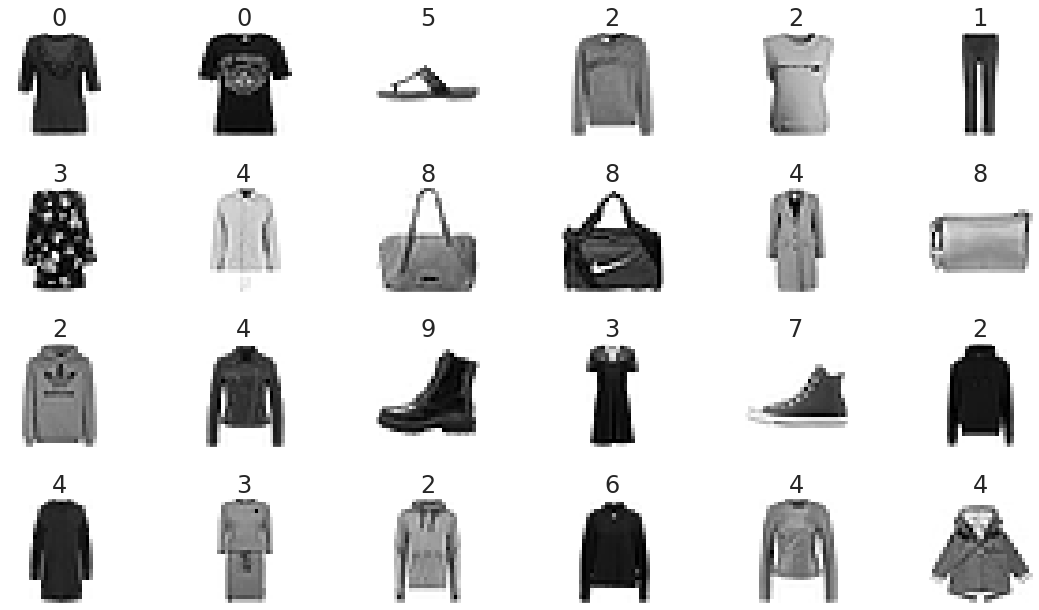

In [58]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) #remove x-axis tick marks
    axes.set_yticks([]) #remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [59]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [60]:
X_train.shape

(60000, 28, 28, 1)

In [61]:
X_test.shape

(10000, 28, 28, 1)

In [62]:
X_train = X_train.astype('float32')/255

In [63]:
X_test = X_test.astype('float32')/255

In [64]:
from tensorflow.keras.utils import to_categorical

In [65]:
y_train = to_categorical(y_train)

In [66]:
y_train.shape

(60000, 10)

In [67]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [68]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [69]:
from tensorflow.keras.models import Sequential

In [70]:
cnn = Sequential()

In [71]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [72]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [73]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [74]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [75]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [76]:
cnn.add(Flatten())

In [78]:
cnn.add(Dense(units=4096, activation = 'relu'))

In [79]:
cnn.add(Dense(units=128, activation='relu'))

In [80]:
cnn.add(Dense(units=10, activation='softmax'))

In [81]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 4096)             

In [32]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


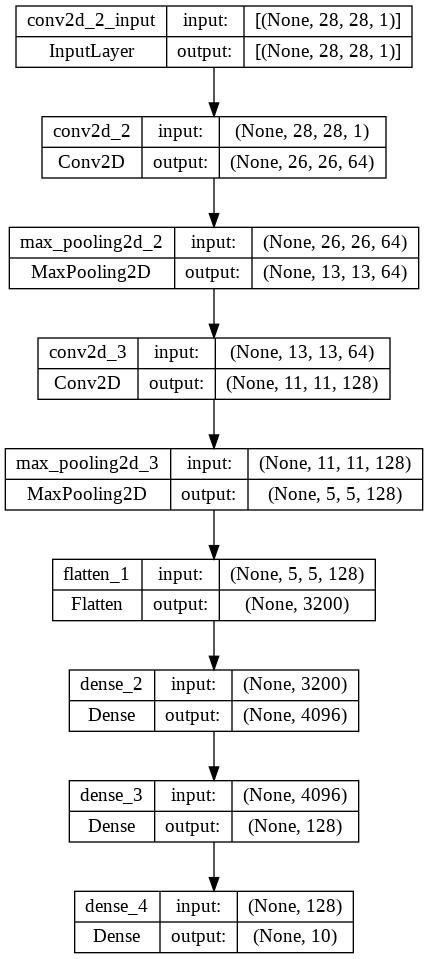

In [82]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [83]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
from tensorflow.keras.callbacks import TensorBoard
import time

tensorboard_callback = TensorBoard(log_dir=f'./logs/mnist{time.time()}', histogram_freq=1, write_graph=True)

In [85]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64,
        validation_split=0.1, callbacks=[tensorboard_callback])

Epoch 1/10
844/844 [==============================] - 11s 12ms/step - loss: 0.4235 - accuracy: 0.8436 - val_loss: 0.3001 - val_accuracy: 0.8907
Epoch 2/10
844/844 [==============================] - 9s 11ms/step - loss: 0.2711 - accuracy: 0.8999 - val_loss: 0.2912 - val_accuracy: 0.8975
Epoch 3/10
844/844 [==============================] - 9s 11ms/step - loss: 0.2222 - accuracy: 0.9170 - val_loss: 0.2606 - val_accuracy: 0.9060
Epoch 4/10
844/844 [==============================] - 9s 11ms/step - loss: 0.1855 - accuracy: 0.9305 - val_loss: 0.2406 - val_accuracy: 0.9157
Epoch 5/10
844/844 [==============================] - 9s 11ms/step - loss: 0.1586 - accuracy: 0.9396 - val_loss: 0.2789 - val_accuracy: 0.9017
Epoch 6/10
844/844 [==============================] - 9s 11ms/step - loss: 0.1298 - accuracy: 0.9513 - val_loss: 0.2744 - val_accuracy: 0.9078
Epoch 7/10
844/844 [==============================] - 9s 11ms/step - loss: 0.1083 - accuracy: 0.9590 - val_loss: 0.2487 - val_accuracy: 0.919

In [86]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3770 - accuracy: 0.9092


In [87]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [88]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [89]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000035%
6: 0.0000000000%
7: 0.0000004169%
8: 0.0000000000%
9: 100.0000000000%


In [90]:
images = X_test.reshape((10000,28,28))
incorrect_predictions = []

for i, (p,e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

In [91]:
len(incorrect_predictions)

908

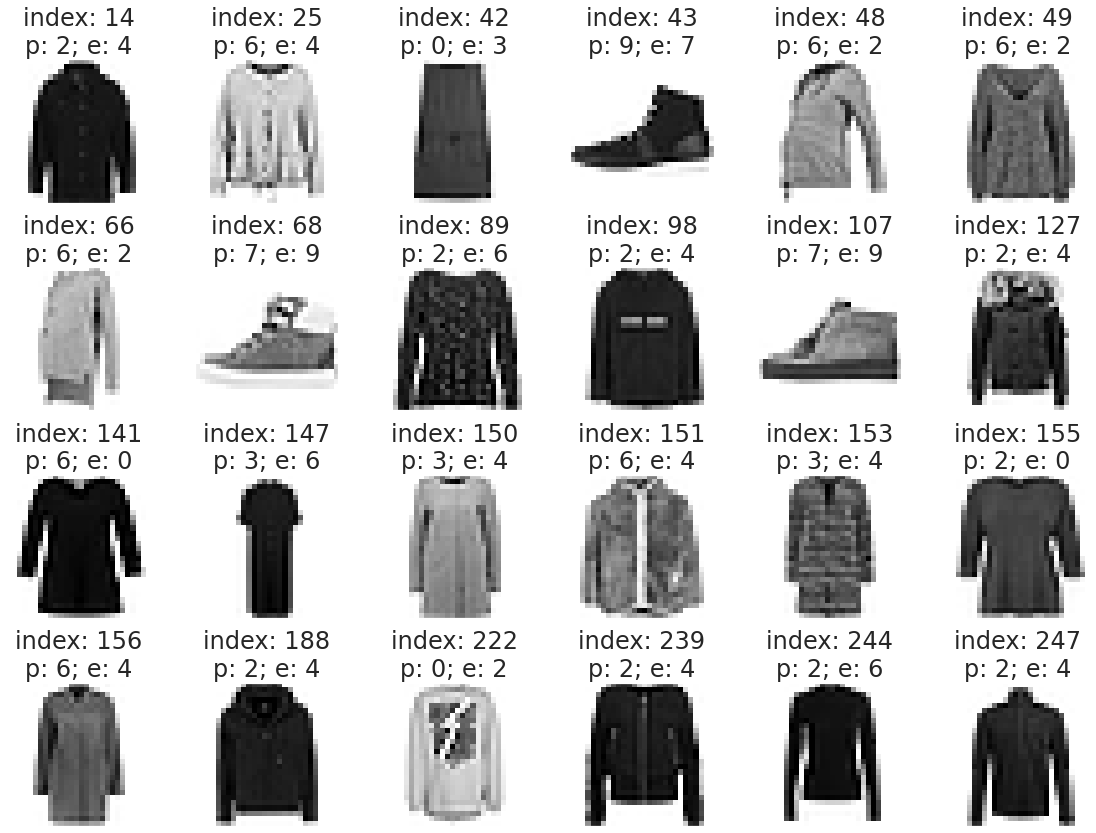

In [92]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [93]:
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [94]:
display_probabilities(predictions[495])

0: 0.0000000004%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000212%
5: 0.7778687868%
6: 0.0000000000%
7: 0.0000009313%
8: 0.0000000005%
9: 99.2221295834%


In [95]:
display_probabilities(predictions[583])

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000002%
6: 0.0000000000%
7: 0.0000002263%
8: 0.0000000000%
9: 100.0000000000%


In [96]:
display_probabilities(predictions[625])

0: 99.9995589256%
1: 0.0000000089%
2: 0.0000009600%
3: 0.0000014367%
4: 0.0000000013%
5: 0.0000000000%
6: 0.0004358027%
7: 0.0000000000%
8: 0.0000002890%
9: 0.0000000002%


In [97]:
cnn.save('fashion_mnist_cnn.h5')

**MNIST vs Fashion_MNIST**

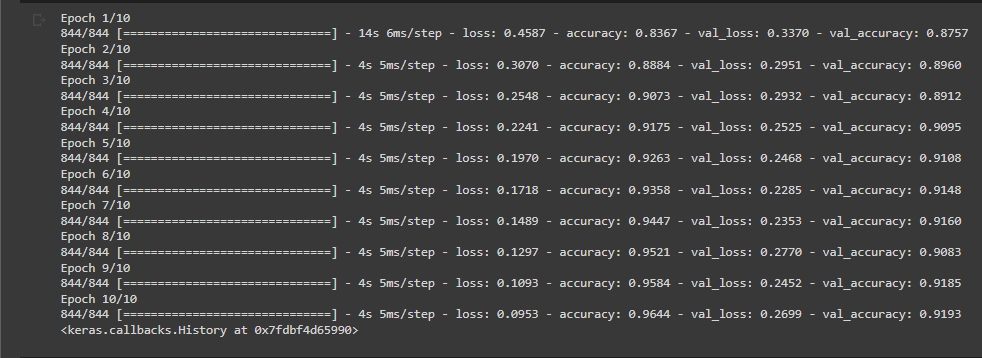

The Training times for the MNIST dataset vs the Fashion_MNIST data set were comparable while using a GPU. 

The Fashion MNIST Dataset had a total of 846 incorrect predictions with an accuracy of 91%. The MNIST Dataset had a total of 96 incorrect predictions. The MNIST data set overall did perform better.

If you add another Dense layer into the code: cnn.add(Dense(units=4096, activation = 'relu')) gives a comparable result in accuracy. If you add too many layers, you do run the risk of overfitting the data.